In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [ ]:
train = '/content/drive/MyDrive/Capstone Project/ML Colab/Dataset/Fix/train'
test = '/content/drive/MyDrive/Capstone Project/ML Colab/Dataset/Fix/test'
validation = '/content/drive/MyDrive/Capstone Project/ML Colab/Dataset/Fix/val'

SIZE = 224
batch_size = 32

In [ ]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    horizontal_flip = True,
    vertical_flip = True,
    rotation_range = 45, 
    zoom_range = 0.2,
    shear_range = 0.2,
    height_shift_range = 0.2,
    width_shift_range = 0.2,
    fill_mode = 'nearest'
)

validation_datagen = ImageDataGenerator(
    rescale = 1./255
)

test_datagen = ImageDataGenerator(
    rescale = 1./255
)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train,
    target_size = (SIZE, SIZE),
    batch_size = batch_size,
    class_mode = 'categorical',
    color_mode = 'rgb',
    shuffle = True,
    seed = 42
)

validation_generator = train_datagen.flow_from_directory(
    validation,
    target_size = (SIZE, SIZE),
    batch_size = batch_size,
    class_mode = 'categorical',
    color_mode = 'rgb',
    shuffle = True,
    seed = 42
)

test_generator = train_datagen.flow_from_directory(
    test,
    target_size = (SIZE, SIZE),
    batch_size = batch_size,
    class_mode = 'categorical',
    color_mode = 'rgb',
    shuffle = True,
    seed = 42
)

Found 704 images belonging to 8 classes.
Found 88 images belonging to 8 classes.
Found 88 images belonging to 8 classes.


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(512, (3, 3), activation = 'relu', input_shape = (SIZE, SIZE, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.3),

    tf.keras.layers.Conv2D(256, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.3),

    tf.keras.layers.Conv2D(128, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.3),

    

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(8, activation = 'softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 512)     14336     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 512)    0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 111, 111, 512)     0         
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 256)     1179904   
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 256)      0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 54, 54, 256)       0

In [ ]:
model.compile(optimizer = 'Adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
history = model.fit(
    train_generator,
    validation_data = validation_generator,
    epochs = 100,
    verbose = 2
)

Epoch 1/100
22/22 - 495s - loss: 2.8264 - accuracy: 0.1761 - val_loss: 1.8898 - val_accuracy: 0.2614 - 495s/epoch - 22s/step
Epoch 2/100
22/22 - 31s - loss: 1.6845 - accuracy: 0.3651 - val_loss: 1.3524 - val_accuracy: 0.4886 - 31s/epoch - 1s/step
Epoch 3/100
22/22 - 30s - loss: 1.4678 - accuracy: 0.4560 - val_loss: 1.2998 - val_accuracy: 0.5000 - 30s/epoch - 1s/step
Epoch 4/100
22/22 - 30s - loss: 1.3270 - accuracy: 0.5057 - val_loss: 1.1921 - val_accuracy: 0.5795 - 30s/epoch - 1s/step
Epoch 5/100
22/22 - 30s - loss: 1.3463 - accuracy: 0.4830 - val_loss: 1.3085 - val_accuracy: 0.5455 - 30s/epoch - 1s/step
Epoch 6/100
22/22 - 31s - loss: 1.2934 - accuracy: 0.5114 - val_loss: 1.2690 - val_accuracy: 0.5227 - 31s/epoch - 1s/step
Epoch 7/100
22/22 - 29s - loss: 1.2707 - accuracy: 0.5284 - val_loss: 1.1652 - val_accuracy: 0.5114 - 29s/epoch - 1s/step
Epoch 8/100
22/22 - 29s - loss: 1.1955 - accuracy: 0.5582 - val_loss: 1.1348 - val_accuracy: 0.6250 - 29s/epoch - 1s/step
Epoch 9/100
22/22 - 2

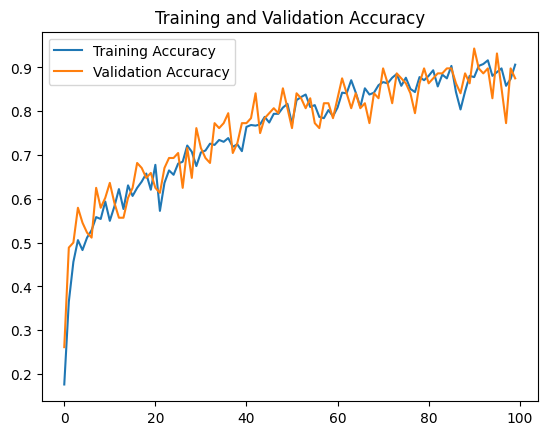

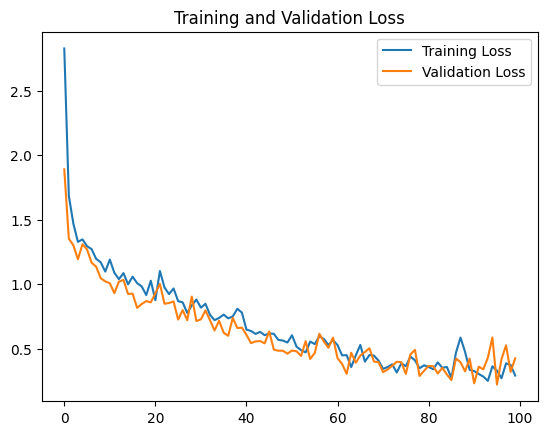

<Figure size 640x480 with 0 Axes>

In [ ]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(accuracy))

# Training and Validation Accuracy
plt.plot(epochs, accuracy, label = 'Training Accuracy')
plt.plot(epochs, val_accuracy, label = 'Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend(loc = 0)
plt.figure()

# Training and Validation Loss
plt.plot(epochs, loss, label = 'Training Loss')
plt.plot(epochs, val_loss, label = 'Validation Loss')
plt.title('Training and Validation Loss')
plt.legend(loc=0)
plt.figure()

plt.show()

In [ ]:
model.evaluate(test_generator, verbose=2)

3/3 - 43s - loss: 0.7446 - accuracy: 0.7614 - 43s/epoch - 14s/step


[0.744649350643158, 0.7613636255264282]

In [ ]:
export_dir = '/content/drive/MyDrive/Capstone Project/ML Colab/Dataset/Fix/saved_model'
tf.saved_model.save(model, export_dir)

In [ ]:
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
tflite_model = converter.convert()

In [ ]:
import pathlib
tflite_model_file = pathlib.Path('/content/drive/MyDrive/Capstone Project/ML Colab/Dataset/Fix/saved_model/ml.tflite')
tflite_model_file.write_bytes(tflite_model)

50268172